In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

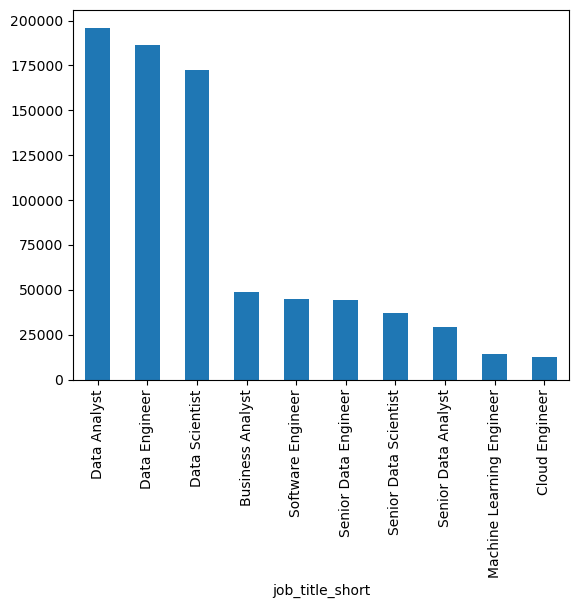

In [9]:
fig,ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
df['job_schedule_type'].value_counts().head(3)

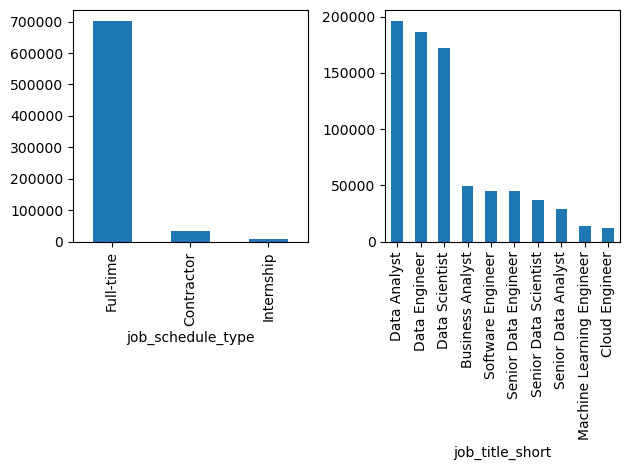

In [12]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()

In [13]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


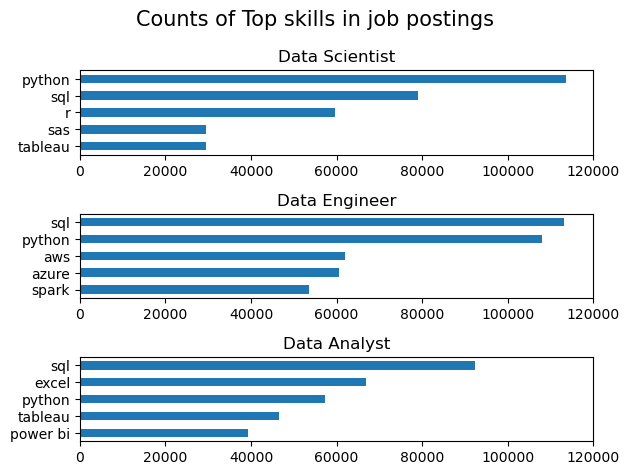

In [26]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']
fig,ax = plt.subplots(3, 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)
fig.suptitle ('Counts of Top skills in job postings', fontsize=15)
fig.tight_layout()